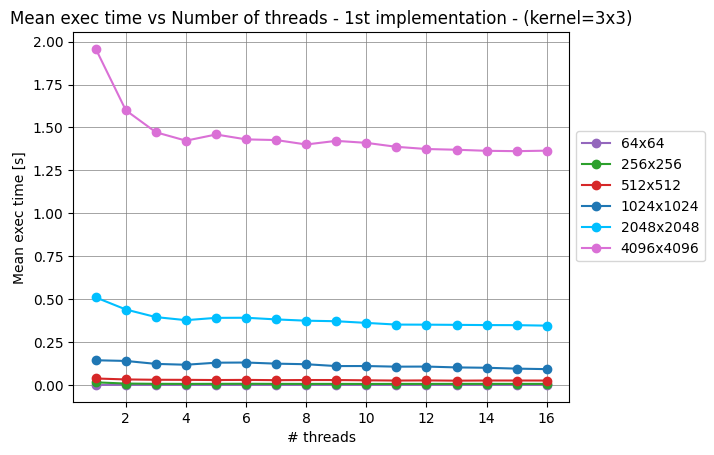

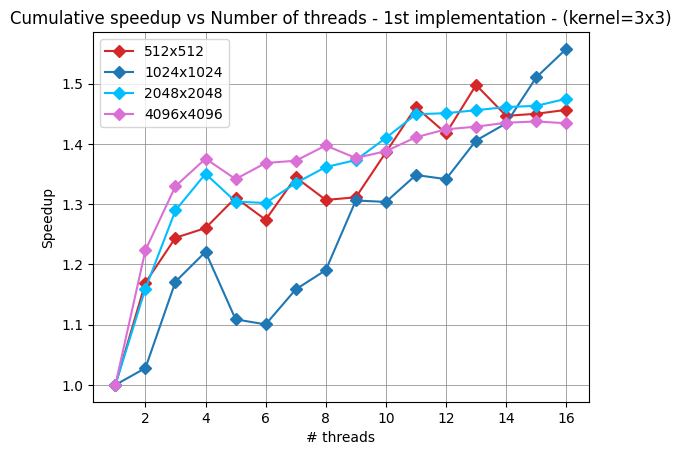

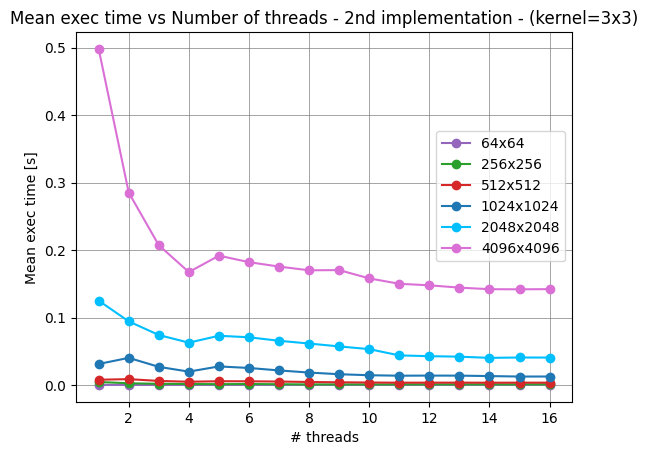

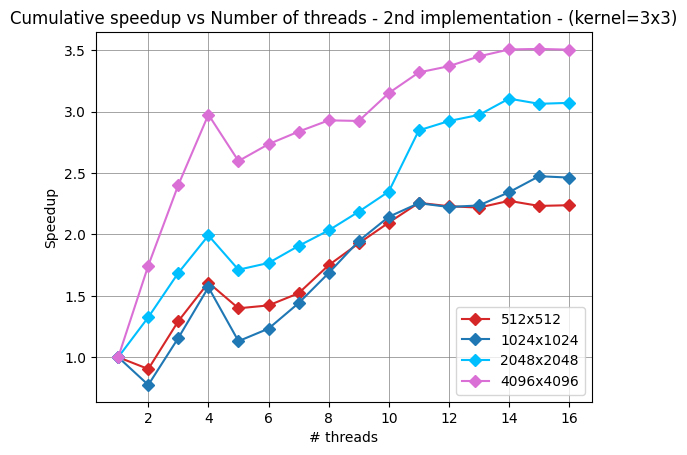

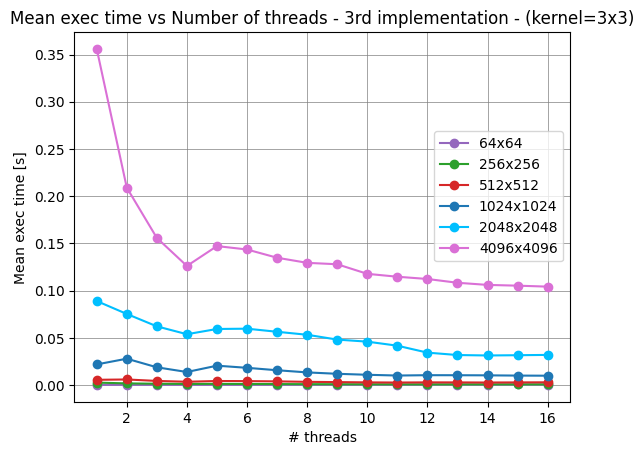

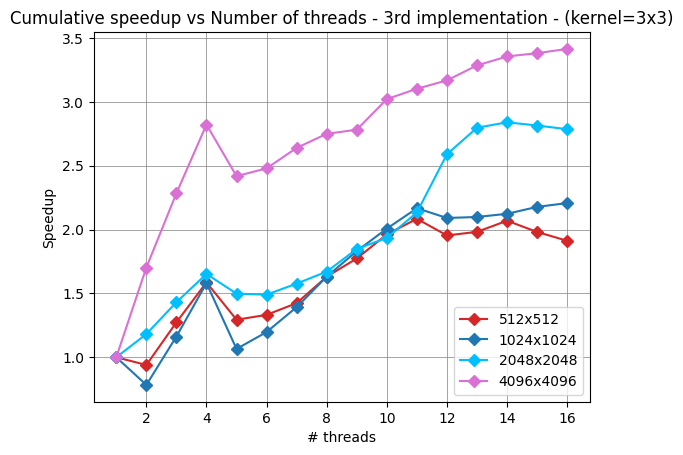

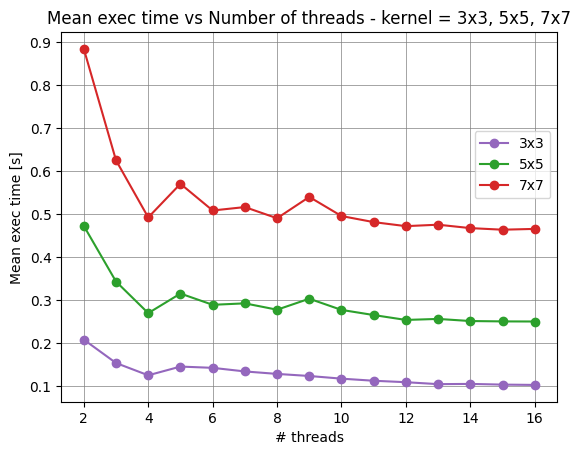

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


path_PTHREAD = '../csv'


image        = ['64','256','512','1024','2048','4096']
image_       = [64,256,512,1024,2048,4096]
threads      = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
threads_     = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
kernel       = ['3x3','5x5','7x7']
colors       = ['tab:purple','tab:green','tab:red','tab:blue','deepskyblue','orchid','tab:olive','m','springgreen',
                'salmon','paleturquoise','dodgerblue','yellow','turquoise','royalblue','tomato','chartreuse']


def main():

    #####################################################################################################################################################
    #                                                          1st implementation (3x3)                                                                 #
    #####################################################################################################################################################

    mean_exec_time_1st = [[],[],[],[],[],[]]


    for l in range(0,len(image_)):
        
        for r in range(0,len(threads_)):

            # parse csv
            raw = pd.read_csv(path_PTHREAD + '/1st/exec_times' + '(' + str(image[l]) + 'x' + str(image[l]) + '_3x3)(' + str(threads[r]) + ').csv')

            exec_times = raw[raw.columns[1]]

            mean_exec_time_1st[l].append(np.mean(exec_times))
        
        plt.plot(threads_,mean_exec_time_1st[l],marker='o',color=colors[l],label=image[l]+'x'+image[l])
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - 1st implementation - (kernel=3x3)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/mean_exec_time_1st(3x3).png', bbox_inches='tight')
    plt.show()


    speedup    = [[],[],[],[],[],[]]

    for i in range(2,len(image_)):

        for j in range(0,len(threads_)):

            speedup[i].append(mean_exec_time_1st[i][0] / mean_exec_time_1st[i][j])

        plt.plot(threads_,speedup[i],marker='D',color=colors[i],label=image[i]+'x'+image[i])


    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Cumulative speedup vs Number of threads - 1st implementation - (kernel=3x3)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/cumulative_speedup_1st(3x3).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                          2nd implementation (3x3)                                                                 #
    #####################################################################################################################################################

    mean_exec_time_2nd = [[],[],[],[],[],[]]


    for l in range(0,len(image_)):
        
        for r in range(0,len(threads_)):

            # parse csv
            raw = pd.read_csv(path_PTHREAD + '/2nd/exec_times' + '(' + str(image[l]) + 'x' + str(image[l]) + '_3x3)(' + str(threads[r]) + ').csv')

            exec_times = raw[raw.columns[1]]

            mean_exec_time_2nd[l].append(np.mean(exec_times))
        
        plt.plot(threads_,mean_exec_time_2nd[l],marker='o',color=colors[l],label=image[l]+'x'+image[l])
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - 2nd implementation - (kernel=3x3)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/mean_exec_time_2nd(3x3).png', bbox_inches='tight')
    plt.show()


    speedup    = [[],[],[],[],[],[]]

    for i in range(2,len(image_)):

        for j in range(0,len(threads_)):

            speedup[i].append(mean_exec_time_2nd[i][0] / mean_exec_time_2nd[i][j])

        plt.plot(threads_,speedup[i],marker='D',color=colors[i],label=image[i]+'x'+image[i])


    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Cumulative speedup vs Number of threads - 2nd implementation - (kernel=3x3)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/cumulative_speedup_2nd(3x3).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                          3rd implementation (5x5)                                                                 #
    #####################################################################################################################################################

    mean_exec_time_3rd = [[],[],[],[],[],[]]


    for l in range(0,len(image_)):
        
        for r in range(0,len(threads_)):

            # parse csv
            raw = pd.read_csv(path_PTHREAD + '/3rd/exec_times' + '(' + str(image[l]) + 'x' + str(image[l]) + '_3x3)(' + str(threads[r]) + ').csv')

            exec_times = raw[raw.columns[1]]

            mean_exec_time_3rd[l].append(np.mean(exec_times))
        
        plt.plot(threads_,mean_exec_time_3rd[l],marker='o',color=colors[l],label=image[l]+'x'+image[l])
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - 3rd implementation - (kernel=3x3)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/mean_exec_time_3rd(3x3).png', bbox_inches='tight')
    plt.show()


    speedup    = [[],[],[],[],[],[]]

    for i in range(2,len(image_)):

        for j in range(0,len(threads_)):

            speedup[i].append(mean_exec_time_3rd[i][0] / mean_exec_time_3rd[i][j])

        plt.plot(threads_,speedup[i],marker='D',color=colors[i],label=image[i]+'x'+image[i])


    plt.ylabel('Speedup')
    plt.xlabel('# threads')
    plt.title('Cumulative speedup vs Number of threads - 3rd implementation - (kernel=3x3)')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True)
    plt.savefig('figures/cumulative_speedup_3rd(3x3).png', bbox_inches='tight')
    plt.show()
    #####################################################################################################################################################


    #####################################################################################################################################################
    #                                                               3x3 vs 5x5 vs 7x7                                                                   #
    #####################################################################################################################################################

    mean_exec_time = [[],[],[]]


    for l in range(0,len(kernel)):
        
        for r in range(1,len(threads_)):

            # parse csv
            raw = pd.read_csv(path_PTHREAD + '/4th/exec_times' + '(4096x4096_' + kernel[l] + ')(' + str(threads[r]) + ').csv')

            exec_times = raw[raw.columns[1]]

            mean_exec_time[l].append(np.mean(exec_times))
        
        plt.plot(threads_[1:],mean_exec_time[l],marker='o',color=colors[l],label=kernel[l])
    
    plt.ylabel('Mean exec time [s]')
    plt.xlabel('# threads')
    plt.title('Mean exec time vs Number of threads - kernel = 3x3, 5x5, 7x7')
    plt.grid(True,color='grey',linewidth='0.5',linestyle='-')
    plt.legend(frameon=True,bbox_to_anchor=(1, 0.75))
    plt.savefig('figures/mean_exec_time_(3x3_5x5_7x7).png', bbox_inches='tight')
    plt.show()

    #####################################################################################################################################################

if __name__ == '__main__':
    main()